In [1]:
import csv
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('params_scale.csv', newline='') as csvfile:
    data = csv.reader(csvfile, delimiter=',')

In [3]:
data = pd.read_csv('params_scale.csv', header=None)
data = data.rename(columns= {0: 'log param', 1:'loss'})
data['param'] = 10**data['log param']
data['log loss'] = np.log10(data['loss'])

Text(0.5, 1.0, 'Loss vs Params')

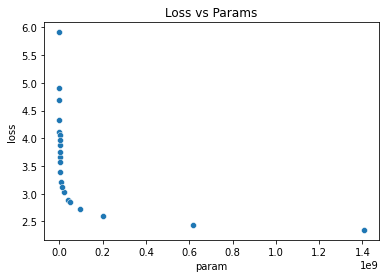

In [4]:
sns.scatterplot(data=data, x="param", y="loss").set_title("Loss vs Params")

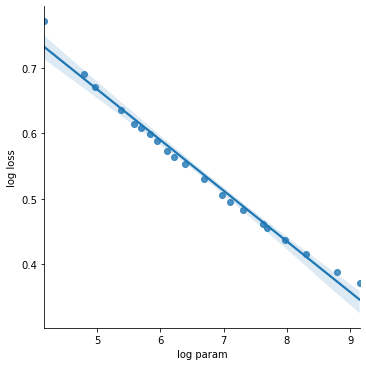

In [5]:
sns.lmplot(data=data, x="log param", y="log loss")

In [6]:
# Do our own regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['log param'],data['log loss'])
print(slope, intercept, r_value, p_value)

-0.07748187257711002 1.0548030829615822 -0.9928785555676999 5.059677796149559e-19


In [7]:
# Add purported power law to the dataset
data['power law'] = 10**intercept * data['param']**slope

<AxesSubplot:title={'center':'Loss vs Params, with Power Law'}, xlabel='param', ylabel='loss'>

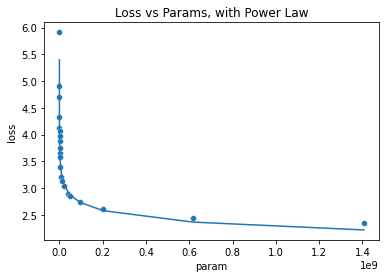

In [8]:
sns.scatterplot(data=data, x="param", y="loss").set_title("Loss vs Params, with Power Law")
sns.lineplot(data=data, x="param", y='power law')

Text(0.5, 1.0, 'Residual Plot for Param Power Law')

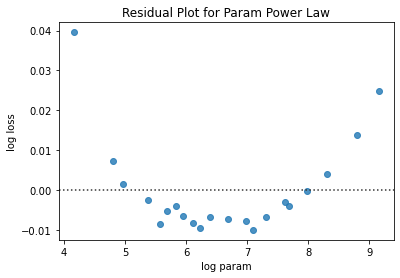

In [9]:
sns.residplot(data=data, x="log param", y="log loss").set_title("Residual Plot for Param Power Law")